ANALISE EXPLORATÓRIA 1
    
Importa as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
import seaborn as sb

Abrimos o dataset da taxa de contaminação, disponível em: https://brasil.io/dataset/covid19/caso_full/?search=&epidemiological_week=&date=2020-10-12&order_for_place=&state=&city=&city_ibge_code=&place_type=&last_available_date=&is_last=&is_repeated=

Até o momento, a base mais atualizada foi a do dia 12-10.
Deixa no dataframe apenas as colunas que serão utilizadas: estado, cidade, tipo do lugar, ultima quantidade confirmada de casos, quantidade de mortes, taxa de mortalidade e a estimativa do tamanho da população

In [2]:
df_covid = pd.read_csv('dataset-covid19.csv', encoding = "ISO-8859-1")
df_covid = df_covid[['state', 'city', 'place_type', 'city_ibge_code', 'last_available_confirmed', 'last_available_deaths', 'last_available_death_rate', 'estimated_population', 'last_available_confirmed_per_100k_inhabitants']]

df_covid

,state,city,place_type,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants
0,AC,NaN,state,12.0,30796,693,0.0225,894470.0,3442.93269
1,AL,Água Branca,city,2700102.0,102,3,0.0294,20230.0,504.20168
2,AL,Anadia,city,2700201.0,502,8,0.0159,17526.0,2864.31587
3,AL,Arapiraca,city,2700300.0,12132,164,0.0135,233047.0,5205.81685
4,AL,Atalaia,city,2700409.0,613,21,0.0343,47365.0,1294.20458
...,...,...,...,...,...,...,...,...,...
5607,MT,Vale de São Domingos,city,5108352.0,19,1,0.0526,3126.0,607.80550
5608,MT,Várzea Grande,city,5108402.0,5234,337,0.0644,287526.0,1820.35712
5609,MT,Vera,city,5108501.0,160,4,0.0250,11402.0,1403.26259
5610,MT,Vila Bela da Santíssima Trindade,city,5105507.0,390,13,0.0333,16271.0,2396.90246


Agora pegaremos apenas as cidades, sem os dados dos estados.
Verificamos se algum dado está faltante

In [3]:
df_covid = df_covid[df_covid.place_type == 'city']
df_covid.isnull().sum()


state                                             0
city                                              0
place_type                                        0
city_ibge_code                                   19
last_available_confirmed                          0
last_available_deaths                             0
last_available_death_rate                         0
estimated_population                             19
last_available_confirmed_per_100k_inhabitants    20
dtype: int64

Vemos que a estimativa da população falta pra 19 cidades.
Então tentamos descobrir porque está faltando.

In [4]:
nulos = df_covid.isnull()
nulos = nulos[nulos.estimated_population == True]
nulos

,state,city,place_type,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants
36,False,False,False,True,False,False,False,True,True
271,False,False,False,True,False,False,False,True,True
603,False,False,False,True,False,False,False,True,True
713,False,False,False,True,False,False,False,True,True
823,False,False,False,True,False,False,False,True,True
1270,False,False,False,True,False,False,False,True,True
1754,False,False,False,True,False,False,False,True,True
2091,False,False,False,True,False,False,False,True,True
2259,False,False,False,True,False,False,False,True,True
2575,False,False,False,True,False,False,False,True,True


Olhamos para um dos indices, para ver o nome da cidade. E constatamos que na verdade ela se refere a "Importados/Indefinidos".

In [5]:
df_covid.loc[58]

state                                                           AL
city                                             Minador do Negrão
place_type                                                    city
city_ibge_code                                         2.70531e+06
last_available_confirmed                                        59
last_available_deaths                                            1
last_available_death_rate                                   0.0169
estimated_population                                          5322
last_available_confirmed_per_100k_inhabitants              1108.61
Name: 58, dtype: object

Diante disso, iremos retirar todos essas linhas que contem o nome de cidade igual a "Importados/Indefinidos".

In [6]:
df_covid = df_covid[df_covid.city != 'Importados/Indefinidos']
df_covid['city_ibge_code'] = df_covid['city_ibge_code'].astype(int)
df_covid

,state,city,place_type,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants
1,AL,Água Branca,city,2700102,102,3,0.0294,20230.0,504.20168
2,AL,Anadia,city,2700201,502,8,0.0159,17526.0,2864.31587
3,AL,Arapiraca,city,2700300,12132,164,0.0135,233047.0,5205.81685
4,AL,Atalaia,city,2700409,613,21,0.0343,47365.0,1294.20458
5,AL,Barra de Santo Antônio,city,2700508,135,14,0.1037,16068.0,840.17924
...,...,...,...,...,...,...,...,...,...
5607,MT,Vale de São Domingos,city,5108352,19,1,0.0526,3126.0,607.80550
5608,MT,Várzea Grande,city,5108402,5234,337,0.0644,287526.0,1820.35712
5609,MT,Vera,city,5108501,160,4,0.0250,11402.0,1403.26259
5610,MT,Vila Bela da Santíssima Trindade,city,5105507,390,13,0.0333,16271.0,2396.90246


Com isso, nossos dados sobre o covid estão limpos agora, e podemos trabalhar com eles.

Através do histograma da quantidade de casos, podemos ver que a maioria das cidades apresenta menos de 6000 casos confirmados.

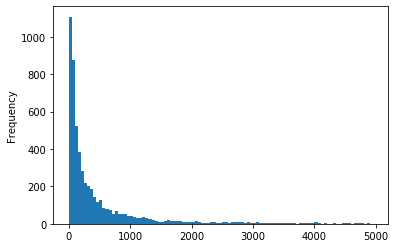

In [7]:
df_covid['last_available_confirmed'].plot.hist(bins=range(0, 5000,50))

Entretando, podemos ver que cerca de 150 cidades brasileiras apresentam mais de 5000 casos confirmados. 

In [8]:
cidades_mais_casos = df_covid[df_covid.last_available_confirmed > 5000]
cidades_mais_casos.describe()

,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants
count,1.590000e+02,159.000000,159.000000,159.000000,1.590000e+02,159.000000
mean,3.261079e+06,17979.125786,614.679245,0.029455,6.052695e+05,3530.691926
std,9.728314e+05,31484.053521,1506.900895,0.016633,1.176657e+06,1784.442350
min,1.100023e+06,5121.000000,57.000000,0.007000,7.515900e+04,938.294820
25%,2.655953e+06,6715.000000,150.000000,0.018100,2.154980e+05,2285.587035
50%,3.304904e+06,8826.000000,250.000000,0.026200,3.323330e+05,3033.172300
75%,3.553456e+06,15830.000000,498.500000,0.034600,5.374505e+05,4166.818330
max,5.300108e+06,316265.000000,13581.000000,0.101800,1.232523e+07,12894.707270


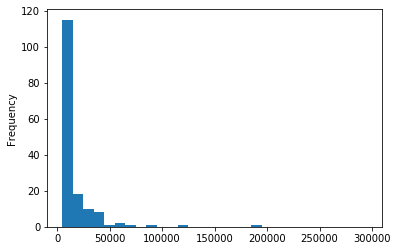

In [9]:
cidades_mais_casos['last_available_confirmed'].plot.hist(bins=range(5000, 301000,10000))

O outro dataset que utilizaremos será o do censo brasileiro, feito pelo IBGE.
Lendo os dados do censo.
Limitamos as colunas que iremos usar, que são: Nome do estado, municipio, expectativa de vida, porcentagem de extremamente pobres, renda per capita e IDHM.
Além disso, é necessário transformar os dados que estão em formato de string para float (nas colunas numéricas).

In [10]:
df_censo = pd.read_excel('IDH_2010.xls', sep=';')
df_censo = df_censo[['Nome da Unidade da Federação','Município','Código do Município','Esperança de vida ao nascer', '% de extremamente pobres', 'Renda per capita', 'IDHM']]
df_censo['Esperança de vida ao nascer'] = df_censo['Esperança de vida ao nascer'].apply(str).str.replace(',', '.').astype(float)
df_censo['% de extremamente pobres'] = df_censo['% de extremamente pobres'].apply(str).str.replace(',', '.').astype(float)
df_censo['Renda per capita'] = df_censo['Renda per capita'].apply(str).str.replace(',', '.').astype(float)
df_censo['IDHM'] = df_censo['IDHM'].apply(str).str.replace(',', '.').astype(float)
df_censo

,Nome da Unidade da Federação,Município,Código do Município,Esperança de vida ao nascer,% de extremamente pobres,Renda per capita,IDHM
0,Rondônia,ALTA FLORESTA D'OESTE,110001,70.75,14.29,476.99,0.641
1,Rondônia,ARIQUEMES,110002,73.36,4.36,689.95,0.702
2,Rondônia,CABIXI,110003,70.39,7.27,457.17,0.650
3,Rondônia,CACOAL,110004,74.27,5.97,738.06,0.718
4,Rondônia,CEREJEIRAS,110005,72.94,4.72,577.18,0.692
...,...,...,...,...,...,...,...
5559,Goiás,VIANÓPOLIS,522200,74.10,0.70,664.33,0.712
5560,Goiás,VICENTINÓPOLIS,522205,73.25,2.62,651.07,0.684
5561,Goiás,VILA BOA,522220,74.07,9.16,376.72,0.647
5562,Goiás,VILA PROPÍCIO,522230,73.09,9.72,401.84,0.634


Entretando, nossas duas bases estão usando códigos diferentes para as cidades (o censo usa de 6 digitos, enquanto que os dados sobre o covid usam de 7 digitos). Para resolver, utilizamos um terceiro data-set que contem essa informação.

In [11]:
df_cods_ibge = pd.read_csv('dataset-codigos-ibge.csv')
df_censo = pd.merge(df_censo, df_cods_ibge, left_on='Código do Município', right_on='id_municipio_6')
df_censo

,Nome da Unidade da Federação,Município,Código do Município,Esperança de vida ao nascer,% de extremamente pobres,Renda per capita,IDHM,id_municipio,id_municipio_6
0,Rondônia,ALTA FLORESTA D'OESTE,110001,70.75,14.29,476.99,0.641,1100015,110001
1,Rondônia,ARIQUEMES,110002,73.36,4.36,689.95,0.702,1100023,110002
2,Rondônia,CABIXI,110003,70.39,7.27,457.17,0.650,1100031,110003
3,Rondônia,CACOAL,110004,74.27,5.97,738.06,0.718,1100049,110004
4,Rondônia,CEREJEIRAS,110005,72.94,4.72,577.18,0.692,1100056,110005
...,...,...,...,...,...,...,...,...,...
5559,Goiás,VIANÓPOLIS,522200,74.10,0.70,664.33,0.712,5222005,522200
5560,Goiás,VICENTINÓPOLIS,522205,73.25,2.62,651.07,0.684,5222054,522205
5561,Goiás,VILA BOA,522220,74.07,9.16,376.72,0.647,5222203,522220
5562,Goiás,VILA PROPÍCIO,522230,73.09,9.72,401.84,0.634,5222302,522230


Verificamos se há algum dado que está faltando.
Como o censo está com todos os dados completos, não é preciso realizar um tramento para esses dados.

In [12]:
df_censo.isnull().sum()

Nome da Unidade da Federação    0
Município                       0
Código do Município             0
Esperança de vida ao nascer     0
% de extremamente pobres        0
Renda per capita                0
IDHM                            0
id_municipio                    0
id_municipio_6                  0
dtype: int64

Agora juntaremos os dois dataframes (do covid e do censo), utilizando os códigos do IBGE

In [13]:
df_censo_covid = pd.merge(df_covid, df_censo, left_on='city_ibge_code', right_on='id_municipio')
df_censo_covid['PIB'] = df_censo_covid['estimated_population'] * df_censo_covid['Renda per capita']
df_censo_covid

,state,city,place_type,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants,Nome da Unidade da Federação,Município,Código do Município,Esperança de vida ao nascer,% de extremamente pobres,Renda per capita,IDHM,id_municipio,id_municipio_6,PIB
0,AL,Água Branca,city,2700102,102,3,0.0294,20230.0,504.20168,Alagoas,ÁGUA BRANCA,270010,68.70,33.30,213.00,0.549,2700102,270010,4.308990e+06
1,AL,Anadia,city,2700201,502,8,0.0159,17526.0,2864.31587,Alagoas,ANADIA,270020,70.35,21.93,239.53,0.568,2700201,270020,4.198003e+06
2,AL,Arapiraca,city,2700300,12132,164,0.0135,233047.0,5205.81685,Alagoas,ARAPIRACA,270030,71.82,11.15,423.28,0.649,2700300,270030,9.864413e+07
3,AL,Atalaia,city,2700409,613,21,0.0343,47365.0,1294.20458,Alagoas,ATALAIA,270040,70.13,16.39,237.33,0.561,2700409,270040,1.124114e+07
4,AL,Barra de Santo Antônio,city,2700508,135,14,0.1037,16068.0,840.17924,Alagoas,BARRA DE SANTO ANTÔNIO,270050,68.90,18.89,247.81,0.557,2700508,270050,3.981811e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,MT,Vale de São Domingos,city,5108352,19,1,0.0526,3126.0,607.80550,Mato Grosso,VALE DE SÃO DOMINGOS,510835,70.91,4.75,479.66,0.656,5108352,510835,1.499417e+06
5556,MT,Várzea Grande,city,5108402,5234,337,0.0644,287526.0,1820.35712,Mato Grosso,VÁRZEA GRANDE,510840,75.50,2.01,668.86,0.734,5108402,510840,1.923146e+08
5557,MT,Vera,city,5108501,160,4,0.0250,11402.0,1403.26259,Mato Grosso,VERA,510850,75.06,3.95,494.23,0.680,5108501,510850,5.635210e+06
5558,MT,Vila Bela da Santíssima Trindade,city,5105507,390,13,0.0333,16271.0,2396.90246,Mato Grosso,VILA BELA DA SANTÍSSIMA TRINDADE,510550,75.57,15.10,439.15,0.645,5105507,510550,7.145410e+06


Algumas correlações podem ser interessantes de ser olhadas:
- N° de casos x Renda per capita

In [14]:
correlacao_casos_renda = df_censo_covid['last_available_confirmed'].corr(df_censo_covid['Renda per capita'])
correlacao_casos_renda

0.22496378591331107

- N° de casos x IDH

In [15]:
correlacao_casos_idh = df_censo_covid['last_available_confirmed'].corr(df_censo_covid['IDHM'])
correlacao_casos_idh

0.14576440272332758

- Taxa de mortes x IDH

In [16]:
correlacao_taxamortes_idh = df_censo_covid['last_available_death_rate'].corr(df_censo_covid['IDHM'])
correlacao_taxamortes_idh


-0.007964015800853005

- Taxa de mortes x Renda per capita

In [17]:
correlacao_taxamortes_renda = df_censo_covid['last_available_death_rate'].corr(df_censo_covid['Renda per capita'])
correlacao_taxamortes_renda

-0.03330634818997371

In [18]:
df_dados = df_censo_covid[['last_available_confirmed','estimated_population', 'Esperança de vida ao nascer','IDHM']]
df_dados = df_dados.rename(columns={'last_available_confirmed': 'casos'})
df_dados = df_dados.rename(columns={'estimated_population': 'Pop'})
df_dados = df_dados.rename(columns={'Esperança de vida ao nascer': 'Exp. Vida'})
df_dados

,casos,Pop,Exp. Vida,IDHM
0,102,20230.0,68.70,0.549
1,502,17526.0,70.35,0.568
2,12132,233047.0,71.82,0.649
3,613,47365.0,70.13,0.561
4,135,16068.0,68.90,0.557
...,...,...,...,...
5555,19,3126.0,70.91,0.656
5556,5234,287526.0,75.50,0.734
5557,160,11402.0,75.06,0.680
5558,390,16271.0,75.57,0.645


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251C0473B88>,
      dtype=object)

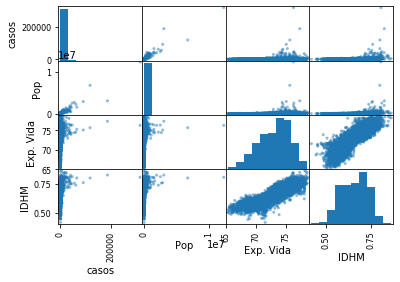

In [19]:
pd.plotting.scatter_matrix(df_dados)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251BD6EB248>,
      dtype=object)

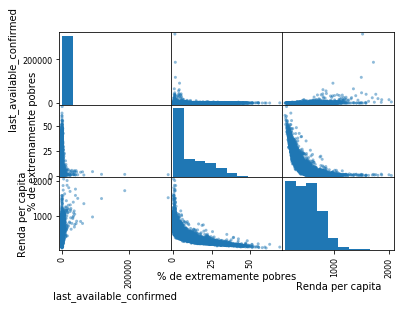

In [20]:
df_dados = df_censo_covid[['last_available_confirmed','% de extremamente pobres', 'Renda per capita']]

pd.plotting.scatter_matrix(df_dados)

Relação entre IDH e taxa de mortes

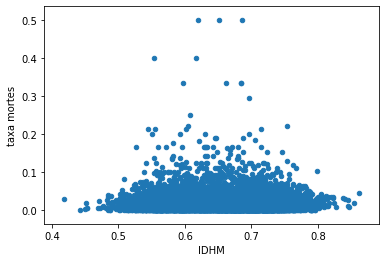

In [21]:
df_dados = df_censo_covid[['last_available_death_rate','IDHM']]
df_dados = df_dados.rename(columns={'last_available_death_rate': 'taxa mortes'})
df_dados.plot.scatter(x = 'IDHM', y = 'taxa mortes' )

Relação entre % de extremamente pobres e taxa de mortes

Relação entre % de extremamente pobres e taxa de mortes

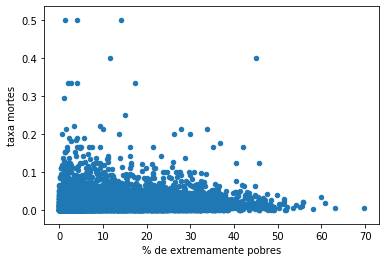

In [22]:
df_dados = df_censo_covid[['last_available_death_rate','% de extremamente pobres']]
df_dados = df_dados.rename(columns={'last_available_death_rate': 'taxa mortes'})
df_dados.plot.scatter(x = '% de extremamente pobres', y = 'taxa mortes' )

Relação entre PIB e número de casos

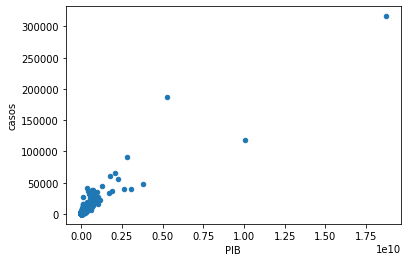

In [23]:
df_dados = df_censo_covid[['last_available_confirmed','PIB']]
df_dados = df_dados.rename(columns={'last_available_confirmed': 'casos'})
df_dados.plot.scatter(x = 'PIB', y = 'casos' )

Coluna para relacionar a população com o número de casos

In [24]:
df_pop_casos = df_censo_covid[['estimated_population', 'last_available_confirmed', 'IDHM', 'Renda per capita', 'PIB']]
df_pop_casos['casos / pop'] = df_pop_casos['last_available_confirmed'] / df_pop_casos['estimated_population']

C:\Users\luank\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Relação entre casos por população e IDH do município

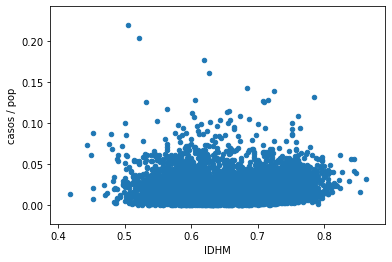

In [25]:
df_pop_casos.plot.scatter(x = 'IDHM', y = 'casos / pop' )

Histograma de distribuição de casos por população

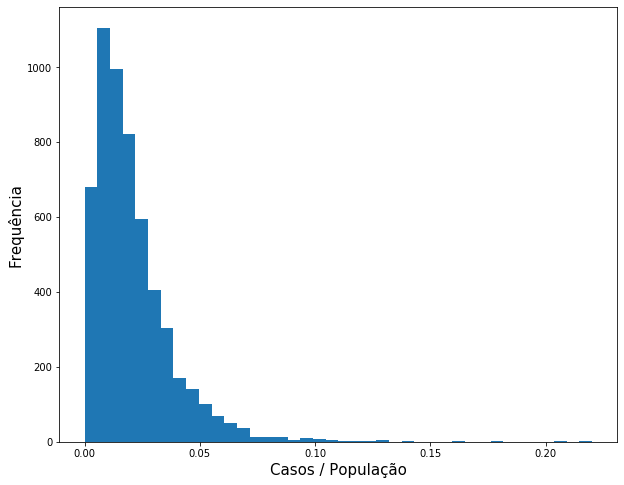

In [26]:
py.figure(figsize=[10,8])
py.hist(df_pop_casos['casos / pop'], bins=40)
py.ylabel('Frequência', fontsize=15)
py.xlabel('Casos / População', fontsize=15)
py.savefig('case_pop.png')

Histograma de distribuição de renda per capita

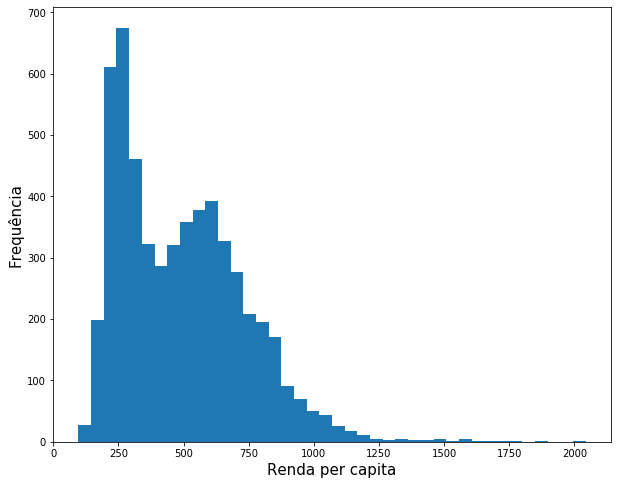

In [27]:
py.figure(figsize=[10,8])
py.hist(df_pop_casos['Renda per capita'], bins=40)
py.ylabel('Frequência', fontsize=15)
py.xlabel('Renda per capita', fontsize=15)
py.savefig('renda.png')

Histograma de distribuição IDH nos municípios

Boxplot da distribuição do IDH nos municípios

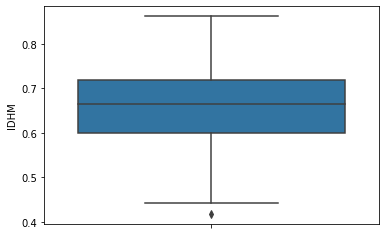

In [28]:
sb.boxplot(x='IDHM', data=df_pop_casos, orient='v')

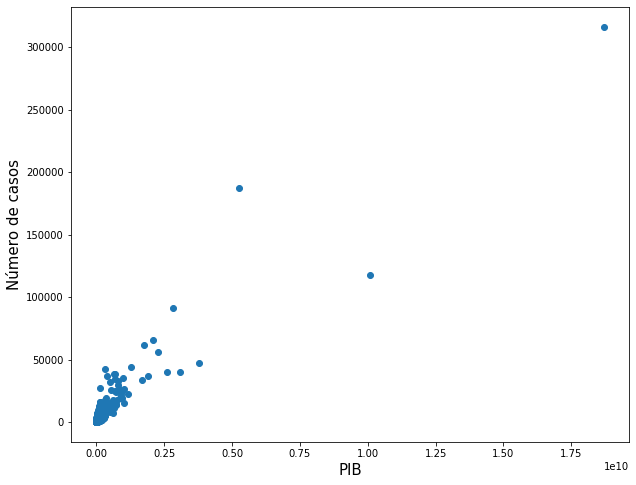

In [29]:
py.figure(figsize=[10,8])
py.scatter(x=df_pop_casos['PIB'], y=df_pop_casos['last_available_confirmed'])
py.ylabel('Número de casos', fontsize=15)
py.xlabel('PIB', fontsize=15)
py.savefig('asdb.png')

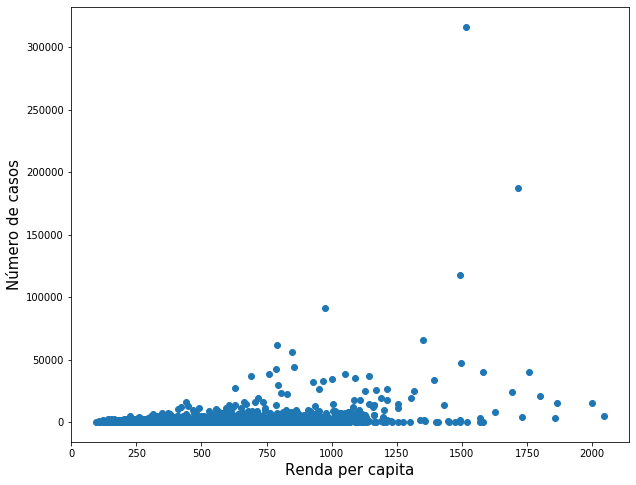

In [30]:
py.figure(figsize=[10,8])
py.scatter(df_pop_casos['Renda per capita'], df_pop_casos['last_available_confirmed'])
py.ylabel('Número de casos', fontsize=15)
py.xlabel('Renda per capita', fontsize=15)
py.savefig('asdb.png')

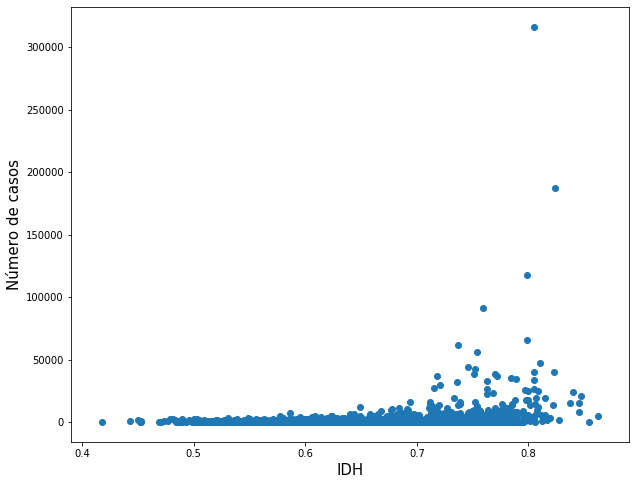

In [31]:
py.figure(figsize=[10,8])
py.scatter(df_pop_casos['IDHM'], df_pop_casos['last_available_confirmed'])
py.ylabel('Número de casos', fontsize=15)
py.xlabel('IDH', fontsize=15)
py.savefig('asdb.png')

Agora lemos o dataset da ocupação hospitalar

In [32]:
df_inter = pd.read_csv('dataset-inter.csv', encoding = "ISO-8859-1")
df_inter

,estado,estadoSigla,municipio,cnes,nomeCnes,dataNotificacaoOcupacao,ofertaRespiradores,ofertaHospCli,ofertaHospUti,ofertaSRAGCli,ofertaSRAGUti,ocupHospCli,ocupHospUti,ocupSRAGCli,ocupSRAGUti,altas,obitos,ocupacaoInformada,algumaOcupacaoInformada
0,Rio de Janeiro,rj,Niterói,12769,NaN,2020-10-18T03:00:09.902Z,NaN,NaN,NaN,NaN,NaN,19.0,0.0,1.0,7.0,0.0,0,True,True
1,Minas Gerais,MG,Passabém,2168200,HOSPITAL SAO JOSE PASSABEM,2020-10-18T03:00:00.698Z,0.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,True,True
2,Espírito Santo,ES,São José do Calçado,2547317,HOSPITAL SAO JOSE,2020-10-18T03:00:12.938Z,6.0,66.0,10.0,0.0,0.0,26.0,8.0,0.0,0.0,0.0,0,True,True
3,Ceará,ce,Fortaleza,7018800,NaN,2020-05-12T12:40:09.887Z,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,True,True
4,Ceará,CE,Aracati,2373009,HOSPITAL E MATERNIDADE SANTA LUISA DE MARILLAC,2020-09-27T03:00:17.054Z,0.0,49.0,0.0,0.0,0.0,13.0,0.0,1.0,0.0,0.0,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,Minas Gerais,MG,Itajubá,2208857,HOSPITAL ESCOLA AISI ITAJUBA,2020-11-01T03:00:40.678Z,30.0,112.0,22.0,66.0,20.0,59.0,21.0,18.0,2.0,0.0,0,True,True
3729,Bahia,BA,Campo Formoso,2799839,HOSPITAL SAO FRANCISCO,2020-11-01T03:00:19.557Z,2.0,88.0,0.0,0.0,0.0,21.0,0.0,1.0,0.0,1.0,0,True,True
3730,Paraná,PR,Sarandi,2825589,METROPOLITANA DE SARANDI,2020-11-01T03:00:51.667Z,28.0,164.0,17.0,29.0,14.0,57.0,18.0,5.0,3.0,0.0,0,True,True
3731,São Paulo,SP,São Paulo,3166597,HOSPITAL ADVENTISTA DE SAO PAULO,2020-11-01T03:00:57.765Z,0.0,40.0,7.0,0.0,0.0,50.0,18.0,3.0,1.0,3.0,0,True,True


Verificamos se há algum valor nul

In [33]:
df_inter.isnull().sum()

estado                       0
estadoSigla                  0
municipio                    0
cnes                         1
nomeCnes                   460
dataNotificacaoOcupacao      0
ofertaRespiradores         460
ofertaHospCli              460
ofertaHospUti              460
ofertaSRAGCli              460
ofertaSRAGUti              460
ocupHospCli                  0
ocupHospUti                  0
ocupSRAGCli                  0
ocupSRAGUti                  0
altas                        0
obitos                       0
ocupacaoInformada            0
algumaOcupacaoInformada      0
dtype: int64

Então retiramos os valores que que não apresetam nomeCnes (pois essas linhas não são as que desejamos trabalhar)

In [34]:
nulos = df_inter.isnull()
nulos = nulos[nulos.nomeCnes == True]
nulos

,estado,estadoSigla,municipio,cnes,nomeCnes,dataNotificacaoOcupacao,ofertaRespiradores,ofertaHospCli,ofertaHospUti,ofertaSRAGCli,ofertaSRAGUti,ocupHospCli,ocupHospUti,ocupSRAGCli,ocupSRAGUti,altas,obitos,ocupacaoInformada,algumaOcupacaoInformada
0,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
8,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
12,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
3651,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
3691,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
3704,False,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False


Geramos agora o histograma das internações (por unidade hospitalar)

Text(0.5, 0, 'Internações')

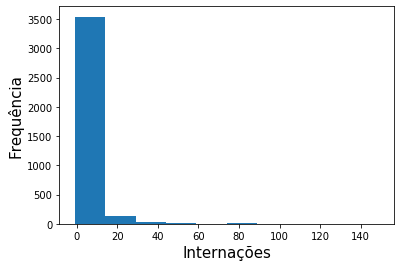

In [35]:
py.hist(df_inter['ocupSRAGUti'])
py.ylabel('Frequência', fontsize=15)
py.xlabel('Internações', fontsize=15)

In [36]:
df_inter[df_inter.municipio == 'Campo Grande']

,estado,estadoSigla,municipio,cnes,nomeCnes,dataNotificacaoOcupacao,ofertaRespiradores,ofertaHospCli,ofertaHospUti,ofertaSRAGCli,ofertaSRAGUti,ocupHospCli,ocupHospUti,ocupSRAGCli,ocupSRAGUti,altas,obitos,ocupacaoInformada,algumaOcupacaoInformada
8,Mato Grosso do Sul,ms,Campo Grande,9768,NaN,2020-08-06T09:09:00.000Z,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,True,True
103,Mato Grosso do Sul,ms,Campo Grande,2599805,NaN,2020-07-29T11:11:00.000Z,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,True,True
593,Mato Grosso do Sul,MS,Campo Grande,2599643,HOSPITAL ADVENTISTA DO PENFIGO UNIDADE CENTRO,2020-10-30T10:06:46.000Z,0.0,52.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,1.0,0,True,True
952,Mato Grosso do Sul,MS,Campo Grande,2599856,CLINICA DE CAMPO GRANDE SA,2020-10-31T08:52:11.000Z,0.0,73.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,True,True
1048,Mato Grosso do Sul,MS,Campo Grande,0009733,HOSPITAL SAO JULIAO CEDAMI CASA VOVO TULIA,2020-10-31T12:35:40.000Z,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True
1240,Mato Grosso do Sul,MS,Campo Grande,0009709,EBSERH HOSP UNIV MARIA APARECIDA PEDROSSIAN,2020-11-01T04:00:46.114Z,58.0,150.0,21.0,10.0,0.0,153.0,18.0,6.0,1.0,0.0,1,True,True
1254,Mato Grosso do Sul,ms,Campo Grande,9709,NaN,2020-08-06T10:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2.0,0.0,3.0,0.0,0.0,0,True,True
1255,Mato Grosso do Sul,ms,Campo Grande,9717,NaN,2020-08-06T09:21:00.000Z,NaN,NaN,NaN,NaN,NaN,7.0,2.0,10.0,13.0,1.0,1,True,True
1405,Mato Grosso do Sul,ms,Campo Grande,9725,NaN,2020-07-01T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,25.0,9.0,25.0,25.0,5.0,2,True,True
1406,Mato Grosso do Sul,ms,Campo Grande,9733,NaN,2020-07-02T17:33:00.000Z,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,True,True


In [37]:
df_inter.isnull().sum()

estado                       0
estadoSigla                  0
municipio                    0
cnes                         1
nomeCnes                   460
dataNotificacaoOcupacao      0
ofertaRespiradores         460
ofertaHospCli              460
ofertaHospUti              460
ofertaSRAGCli              460
ofertaSRAGUti              460
ocupHospCli                  0
ocupHospUti                  0
ocupSRAGCli                  0
ocupSRAGUti                  0
altas                        0
obitos                       0
ocupacaoInformada            0
algumaOcupacaoInformada      0
dtype: int64

Geramos agora um histograma da quantidade de respiradores por unidade hospitalar

C:\Users\luank\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\luank\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Qtd de respiradores')

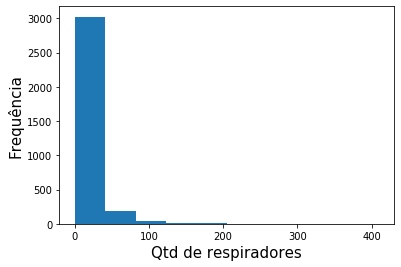

In [38]:
py.hist(df_inter['ofertaRespiradores'])
py.ylabel('Frequência', fontsize=15)
py.xlabel('Qtd de respiradores', fontsize=15)

Criamos duas novas colunas no dataset: % de ocupação de leitos para SRAG, tanto do tipo uti como cli 
(é necessário forçar alguns valores para zero nos casos de divisão por 0, para facilitar a análise)

In [39]:
df_inter["taxa ocupado SRAG uti"] = df_inter["ocupSRAGUti"] / df_inter["ofertaSRAGUti"]
df_inter["taxa ocupado SRAG cli"] = df_inter["ocupSRAGCli"] / df_inter["ofertaSRAGCli"]
df_inter[df_inter==np.inf]=np.nan
df_inter[df_inter== -np.inf]=np.nan
df_inter["taxa ocupado SRAG uti"].fillna(0, inplace=True)
df_inter["taxa ocupado SRAG cli"].fillna(0, inplace=True)
df_inter

,estado,estadoSigla,municipio,cnes,nomeCnes,dataNotificacaoOcupacao,ofertaRespiradores,ofertaHospCli,ofertaHospUti,ofertaSRAGCli,...,ocupHospCli,ocupHospUti,ocupSRAGCli,ocupSRAGUti,altas,obitos,ocupacaoInformada,algumaOcupacaoInformada,taxa ocupado SRAG uti,taxa ocupado SRAG cli
0,Rio de Janeiro,rj,Niterói,12769,NaN,2020-10-18T03:00:09.902Z,NaN,NaN,NaN,NaN,...,19.0,0.0,1.0,7.0,0.0,0,True,True,0.000000,0.000000
1,Minas Gerais,MG,Passabém,2168200,HOSPITAL SAO JOSE PASSABEM,2020-10-18T03:00:00.698Z,0.0,17.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,True,True,0.000000,0.000000
2,Espírito Santo,ES,São José do Calçado,2547317,HOSPITAL SAO JOSE,2020-10-18T03:00:12.938Z,6.0,66.0,10.0,0.0,...,26.0,8.0,0.0,0.0,0.0,0,True,True,0.000000,0.000000
3,Ceará,ce,Fortaleza,7018800,NaN,2020-05-12T12:40:09.887Z,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,True,True,0.000000,0.000000
4,Ceará,CE,Aracati,2373009,HOSPITAL E MATERNIDADE SANTA LUISA DE MARILLAC,2020-09-27T03:00:17.054Z,0.0,49.0,0.0,0.0,...,13.0,0.0,1.0,0.0,0.0,0,True,True,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,Minas Gerais,MG,Itajubá,2208857,HOSPITAL ESCOLA AISI ITAJUBA,2020-11-01T03:00:40.678Z,30.0,112.0,22.0,66.0,...,59.0,21.0,18.0,2.0,0.0,0,True,True,0.100000,0.272727
3729,Bahia,BA,Campo Formoso,2799839,HOSPITAL SAO FRANCISCO,2020-11-01T03:00:19.557Z,2.0,88.0,0.0,0.0,...,21.0,0.0,1.0,0.0,1.0,0,True,True,0.000000,0.000000
3730,Paraná,PR,Sarandi,2825589,METROPOLITANA DE SARANDI,2020-11-01T03:00:51.667Z,28.0,164.0,17.0,29.0,...,57.0,18.0,5.0,3.0,0.0,0,True,True,0.214286,0.172414
3731,São Paulo,SP,São Paulo,3166597,HOSPITAL ADVENTISTA DE SAO PAULO,2020-11-01T03:00:57.765Z,0.0,40.0,7.0,0.0,...,50.0,18.0,3.0,1.0,3.0,0,True,True,0.000000,0.000000


In [40]:
df_inter["taxa ocupado SRAG uti"].describe()

count    3733.000000
mean        0.115468
std         0.335814
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: taxa ocupado SRAG uti, dtype: float64

In [53]:
df_inter = df_inter.sort_values("taxa ocupado SRAG uti")
df_inter= df_inter.rename(columns={'estadoSigla': 'UF'})
df_inter= df_inter.rename(columns={'municipio': 'Nome do município'})
df_inter.tail()

,estado,UF,Nome do município,cnes,nomeCnes,dataNotificacaoOcupacao,ofertaRespiradores,ofertaHospCli,ofertaHospUti,ofertaSRAGCli,...,ocupHospCli,ocupHospUti,ocupSRAGCli,ocupSRAGUti,altas,obitos,ocupacaoInformada,algumaOcupacaoInformada,taxa ocupado SRAG uti,taxa ocupado SRAG cli
1999,São Paulo,SP,São Paulo,2077507,HOSPITAL LEFORTE LIBERDADE,2020-10-31T10:34:32.000Z,41.0,202.0,30.0,0.0,...,0.0,0.0,34.0,15.0,4.0,4,True,True,3.750000,0.000000
1109,Minas Gerais,MG,Curvelo,2178559,HOSPITAL SANTO ANTONIO,2020-10-31T03:00:57.364Z,14.0,80.0,10.0,5.0,...,22.0,12.0,5.0,4.0,2.0,0,True,True,4.000000,1.000000
2087,Rio Grande do Sul,RS,Novo Hamburgo,2232146,FUNDACAO DE SAUDE PUBLICA DE NOVO HAMBURGO FSNH,2020-10-31T14:59:11.000Z,44.0,185.0,20.0,23.0,...,0.0,23.0,14.0,13.0,0.0,7,True,True,4.333333,0.608696
531,Rio Grande do Sul,RS,Gravataí,2232049,HOSPITAL DOM JOAO BECKER,2020-10-30T11:22:30.000Z,21.0,191.0,8.0,18.0,...,0.0,18.0,13.0,10.0,0.0,3,True,True,5.000000,0.722222
2769,Rio de Janeiro,RJ,Rio de Janeiro,2280183,HOSPITAL MUNICIPAL SOUZA AGUIAR,2020-09-22T03:00:00.000Z,55.0,341.0,55.0,22.0,...,260.0,28.0,17.0,10.0,0.0,0,True,True,5.000000,0.772727


Agora pegamos apenas as unidades que apresentam uma taxa de ocupação maior que 1 (100%), e vemos alguns dados estatisticos sobre ele, e geramos um boxplot.

In [42]:
df_inter_lotado = df_inter[df_inter["taxa ocupado SRAG uti"] >= 1 ]
df_inter_lotado["taxa ocupado SRAG uti"].describe()

count    95.000000
mean      1.620287
std       0.868550
min       1.000000
25%       1.000000
50%       1.333333
75%       1.891667
max       5.000000
Name: taxa ocupado SRAG uti, dtype: float64

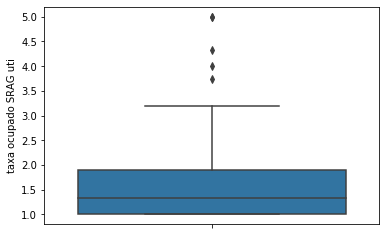

In [43]:
sb.boxplot(x="taxa ocupado SRAG uti", data=df_inter_lotado, orient='v')

Abrindo o indice de vulnerabilidade de espalhamento do coronavirus

In [44]:
df_ivc = pd.read_excel('IVC.xlsx', sheet_name='IVC Ranking', sep=';')
df_ivc

,Ranking,Nome do município,UF,População 2019,Subíndice Densidade Demográfica,Subíndice Faixa etária,Subíndice Saúde,Subíndice Infraestrutura sanitária,Subíndice Mercado de trabalho,ÍNDICE DE VULNERABILIDADE AO COVID-19V (IVC)
0,1,São João de Meriti,RJ,472406,0.088079,0.708669,0.968032,0.973457,0.149701,0.437728
1,2,Taboão da Serra,SP,289664,0.070915,0.803174,0.948190,0.963748,0.260481,0.455477
2,3,Carapicuíba,SP,400927,0.139023,0.800230,0.942306,0.955407,0.168696,0.469101
3,4,Nilópolis,RJ,162485,0.215343,0.632816,0.973222,0.988113,0.142522,0.483243
4,5,Diadema,SP,423884,0.158477,0.823250,0.937831,0.983212,0.298224,0.502564
...,...,...,...,...,...,...,...,...,...,...
5565,5566,Borá,SP,837,0.999502,0.658200,0.918525,0.928477,0.676196,0.882844
5566,5567,Chapadão do Céu,GO,10167,0.999683,0.928029,0.950587,0.894780,0.425712,0.885451
5567,5568,Palmas,TO,299127,0.990614,0.889578,0.976131,0.901208,0.486397,0.889308
5568,5569,Rio Quente,GO,4493,0.998723,0.815278,0.982439,0.920132,0.539245,0.893323


In [45]:
df_covid= df_covid.rename(columns={'state': 'UF'})
df_covid= df_covid.rename(columns={'city': 'Nome do município'})
df_ivc = df_ivc.rename(columns={'ÍNDICE DE VULNERABILIDADE AO COVID-19V     (IVC)': 'IVC'})


In [60]:
df_covid_ivc = pd.merge(df_covid,df_ivc, on=["Nome do município", "UF"])
df_covid_ivc_inter = pd.merge(df_covid_ivc,df_inter, on=["Nome do município", "UF"])
df_covid_ivc_inter = df_covid_ivc_inter[['UF', 'last_available_confirmed', 'last_available_deaths',
       'last_available_death_rate', 'last_available_confirmed_per_100k_inhabitants', 'População 2019', 'ofertaRespiradores', 'ofertaHospCli', 'ofertaHospUti', 'ofertaSRAGCli',
       'ofertaSRAGUti', 'ocupHospCli', 'ocupHospUti', 'ocupSRAGCli',
       'ocupSRAGUti', 'taxa ocupado SRAG uti','taxa ocupado SRAG cli']]
##a = df_censo_covid['last_available_confirmed'].corr(df_censo_covid['IDHM'])
df_covid_ivc_inter.tail()


,UF,last_available_confirmed,last_available_deaths,last_available_death_rate,last_available_confirmed_per_100k_inhabitants,População 2019,ofertaRespiradores,ofertaHospCli,ofertaHospUti,ofertaSRAGCli,ofertaSRAGUti,ocupHospCli,ocupHospUti,ocupSRAGCli,ocupSRAGUti,taxa ocupado SRAG uti,taxa ocupado SRAG cli
3265,MT,5234,337,0.0644,1820.35712,284971,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000
3266,MT,5234,337,0.0644,1820.35712,284971,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000
3267,MT,5234,337,0.0644,1820.35712,284971,8.0,238.0,10.0,88.0,40.0,36.0,13.0,36.0,13.0,0.325,0.409091
3268,MT,390,13,0.0333,2396.90246,16128,2.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000
3269,MT,245,5,0.0204,924.66787,26037,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251BE686508>,
      dtype=object)

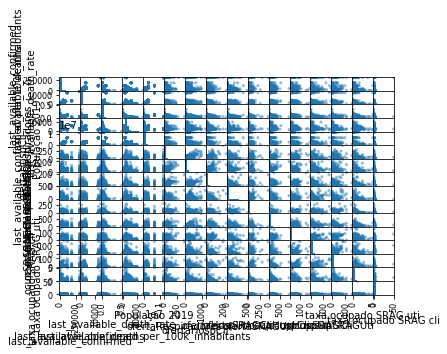

In [59]:
from sklearn.cluster import KMeans